In [1]:
suppressMessages(suppressWarnings(source("config.R")))

## import library sizes

In [2]:
get_sample = function(idn_sample){
    idn = idn_sample
    idn = str_replace(
        string = idn, 
        pattern = "Input[0-9]", 
        replacement = "Input")
    idn = str_replace(
        string = idn, 
        pattern = "TFX[0-9]_", 
        replacement="TFX_")
    return(idn)
}

In [16]:
fdiry = file.path(FD_WRK, "source")
fname = "library_size.txt"
fpath = file.path(fdiry, fname)

ctypes = c(col_integer(), col_character())
cnames = c("Size", "Fpath")
dat_lib = read_tsv(fpath, col_types=ctypes, col_names = cnames)
dat_lib = dat_lib %>% 
    mutate(SID = tools::file_path_sans_ext(basename(Fpath))) %>%
    mutate(Sample = get_sample(SID))
dat_lib = dat_lib %>% dplyr::select(Size, SID, Sample)
head(dat_lib)

Size,SID,Sample
18666630,Input1,Input
20167924,Input2,Input
23280988,Input3,Input
19003938,Input4,Input
15325016,Input5,Input
48376253,TFX2_AZD2906,TFX_AZD2906


## Import bed files

In [4]:
FD_DAT = file.path(FD_WRK, "annotation_fragment")
system(paste0("ls -d ", FD_DAT, "/*/"), intern=TRUE)

[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input/"    
 [2] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input1/"   
 [3] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input2/"   
 [4] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input3/"   
 [5] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input4/"   
 [6] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input5/"   
 [7] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX2_DMSO/"
 [8] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX2_Dex/" 
 [9] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX3_DMSO/"
[10] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX3_Dex/" 
[11] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX4_DMSO/"
[12] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX4_Dex/" 
[13] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX5_DMSO/"
[14] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX5_Dex/" 
[15] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX_DMSO/" 
[16] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX_Dex/"

In [5]:
idn_samples = c(
    paste0("Input", 1:5),
    paste0("TFX", 2:5, "_DMSO"),
    paste0("TFX", 2:5, "_Dex"))
idn_samples

[1] "Input1"    "Input2"    "Input3"    "Input4"    "Input5"    "TFX2_DMSO"
 [7] "TFX3_DMSO" "TFX4_DMSO" "TFX5_DMSO" "TFX2_Dex"  "TFX3_Dex"  "TFX4_Dex" 
[13] "TFX5_Dex"

In [6]:
ctypes = c(col_character(), col_integer(), col_integer(), col_integer(),
           col_character(), col_integer(), col_integer(), col_character(),
           col_double(), col_integer())
cnames = c("Chrom_Frag",  "Start_Frag",  "End_Frag",  "Count_Frag", 
           "Chrom_Motif", "Start_Motif", "End_Motif", "Motif", "Score", 
           "Overlap")

target = "target_PER1"
motif  = "chr17"

lst_dat_bed = lapply(idn_samples, function(idn_sample){
    fdiry = file.path(FD_DAT, idn_sample)
    fname = paste0(target, "_", motif, ".bed")
    fpath = file.path(fdiry, fname)
    dat   = read_tsv(fpath, col_types=ctypes, col_names=cnames)
    dat   = dat %>% mutate(SID = idn_sample)
    return(dat)
})

In [7]:
dat = bind_rows(lst_dat_bed)
dat = dat %>% 
   group_by(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Motif, SID) %>% 
   summarize(Count_Motif = n())
head(dat)

`summarise()` has grouped output by 'Chrom_Frag', 'Start_Frag', 'End_Frag', 'Count_Frag', 'Motif'. You can override using the `.groups` argument.


Chrom_Frag,Start_Frag,End_Frag,Count_Frag,Motif,SID,Count_Motif
chr17,8148000,8148888,1,AP1/1,TFX2_Dex,1
chr17,8148000,8148888,1,AP1/1,TFX2_DMSO,1
chr17,8148000,8148888,1,AP1/2,TFX2_Dex,1
chr17,8148000,8148888,1,AP1/2,TFX2_DMSO,1
chr17,8148000,8148888,1,CENBP,TFX2_Dex,1
chr17,8148000,8148888,1,CENBP,TFX2_DMSO,1


In [29]:
table (dat$Count_Motif)


     1      2      3      4      5      6      7      8      9     10     11 
540143 253860 123602  58745  36749  18259  10323   5870   4966   2239   2217 
    12     13     14     15     16     17     18     19     20 
  4492   3422   3398   2268   1053    550     94     46     38 

In [10]:
tmp

Chrom_Frag,Start_Frag,End_Frag,Count_Frag,Motif,SID,Count_Motif
chr17,8148000,8148888,1,AP1/1,TFX2_Dex,1
chr17,8148000,8148888,1,AP1/1,TFX2_DMSO,1
chr17,8148000,8148888,1,NR/20,TFX2_Dex,1
chr17,8148000,8148888,1,NR/20,TFX2_DMSO,1
chr17,8148001,8148888,1,AP1/1,TFX2_DMSO,1
chr17,8148001,8148888,1,NR/20,TFX2_DMSO,1
chr17,8148003,8149020,1,AP1/1,Input2,2
chr17,8148003,8149021,1,AP1/1,Input4,2
chr17,8148012,8149137,1,AP1/1,TFX4_DMSO,2
chr17,8148012,8149138,1,AP1/1,TFX4_DMSO,2


In [22]:
dat = bind_rows(lst_dat_bed)
dat = dat %>% 
   group_by(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Motif, SID) %>% 
   summarize(Count_Motif = n())

dat = dat %>% dplyr::filter(Motif == "AP1/1" | Motif == "NR/20")
head(dat)

`summarise()` has grouped output by 'Chrom_Frag', 'Start_Frag', 'End_Frag', 'Count_Frag', 'Motif'. You can override using the `.groups` argument.


Chrom_Frag,Start_Frag,End_Frag,Count_Frag,Motif,SID,Count_Motif
chr17,8148000,8148888,1,AP1/1,TFX2_Dex,1
chr17,8148000,8148888,1,AP1/1,TFX2_DMSO,1
chr17,8148000,8148888,1,NR/20,TFX2_Dex,1
chr17,8148000,8148888,1,NR/20,TFX2_DMSO,1
chr17,8148001,8148888,1,AP1/1,TFX2_DMSO,1
chr17,8148001,8148888,1,NR/20,TFX2_DMSO,1


In [63]:
tmp = dat %>% group_by(Motif, Count_Motif, SID) %>% summarize(
    Total_Frag = sum(Count_Frag),
    Mean_Frag = mean(Count_Frag))
tmp = left_join(tmp, dat_lib, by="SID")
tmp = tmp %>% mutate(
    Norm_Frag = log10(Total_Frag) - log10(Size),
    Norm_Mean_Frag = log10(Mean_Frag) - log10(Size))
head(tmp)

`summarise()` has grouped output by 'Motif', 'Count_Motif'. You can override using the `.groups` argument.


Motif,Count_Motif,SID,Total_Frag,Mean_Frag,Size,Sample,Norm_Frag,Norm_Mean_Frag
AP1/1,1,Input1,64,1.015873,18666630,Input,-5.464886,-7.264226
AP1/1,1,Input2,77,1.013158,20167924,Input,-5.418170,-7.298984
AP1/1,1,Input3,108,1.009346,23280988,Input,-5.333578,-7.362961
AP1/1,1,Input4,66,1.047619,19003938,Input,-5.459300,-7.258640
AP1/1,1,Input5,51,1.000000,15325016,Input,-5.477831,-7.185401
AP1/1,1,TFX2_Dex,672,1.338645,45413539,TFX_Dex,-4.829816,-7.530520


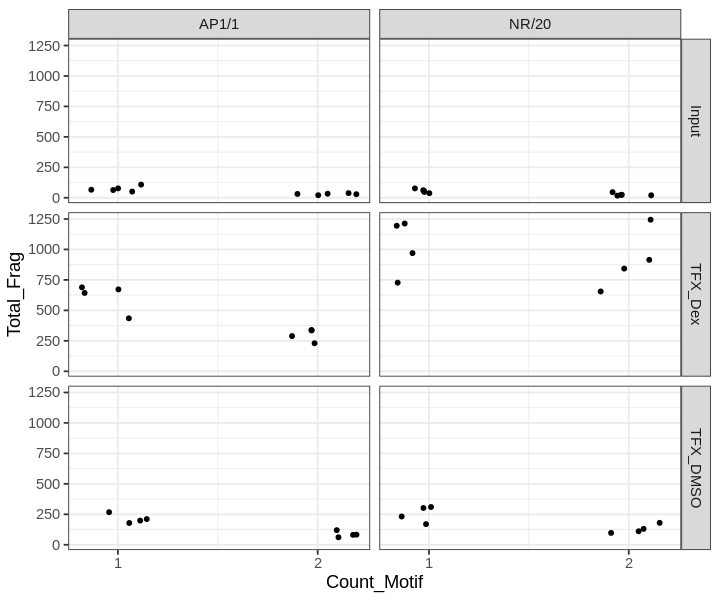

In [66]:
options(repr.plot.height=5, repr.plot.width=6)
set.seed(123)
ggplot(tmp, aes(x=Count_Motif, y=Total_Frag)) + 
geom_jitter(width=0.2, size=1) + 
scale_x_continuous(breaks=c(1,2)) +
theme_bw() +
facet_grid(Sample~Motif)

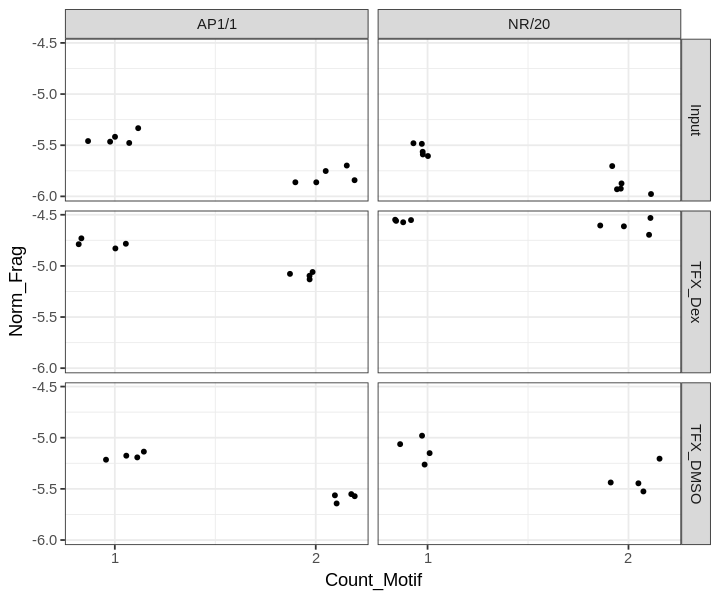

In [67]:
options(repr.plot.height=5, repr.plot.width=6)
set.seed(123)

ggplot(tmp, aes(x=Count_Motif, y=Norm_Frag)) + 
geom_jitter(width=0.2, size=1) + 
scale_x_continuous(breaks=c(1,2)) +
theme_bw() +
facet_grid(Sample~Motif)

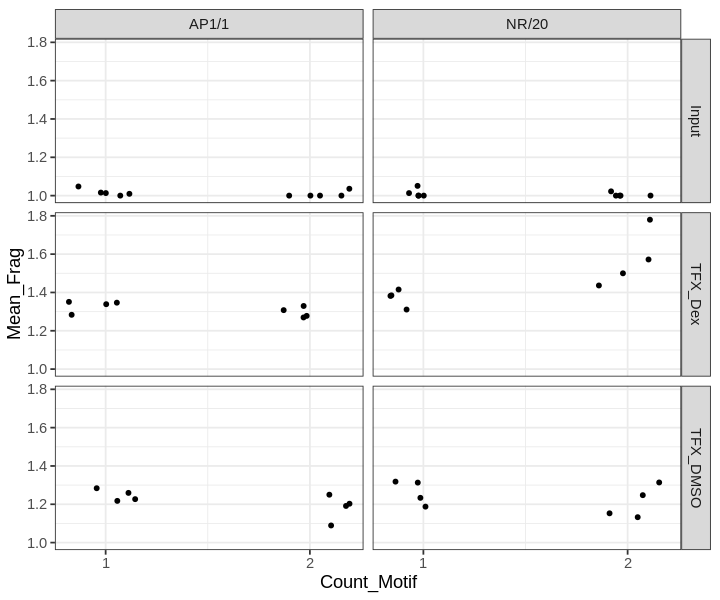

In [68]:
options(repr.plot.height=5, repr.plot.width=6)
set.seed(123)

ggplot(tmp, aes(x=Count_Motif, y=Mean_Frag)) + 
geom_jitter(width=0.2, size=1) + 
scale_x_continuous(breaks=c(1,2)) +
theme_bw() +
facet_grid(Sample~Motif)

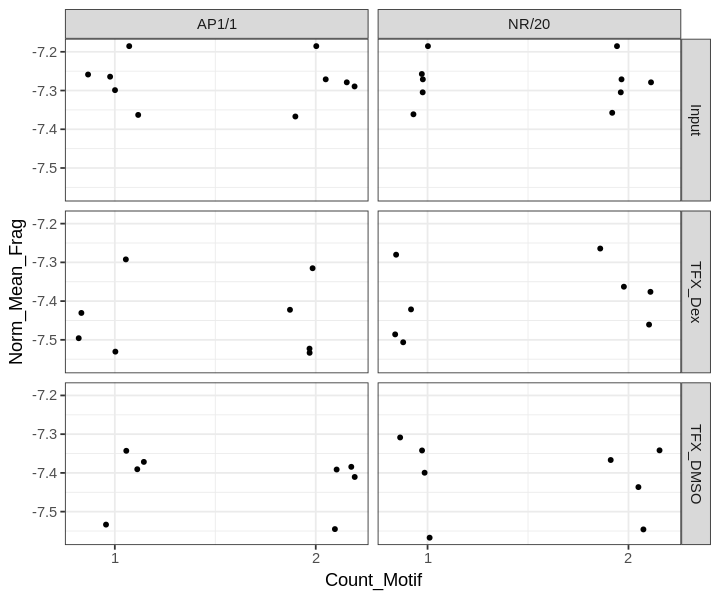

In [69]:
options(repr.plot.height=5, repr.plot.width=6)
set.seed(123)

ggplot(tmp, aes(x=Count_Motif, y=Norm_Mean_Frag)) + 
geom_jitter(width=0.2, size=1) + 
scale_x_continuous(breaks=c(1,2)) +
theme_bw() +
facet_grid(Sample~Motif)

In [53]:
tmp = dat %>% 
    group_by(Chrom_Frag, Start_Frag, End_Frag, SID, Count_Frag) %>% 
    summarize(
        Motifs=paste(unique(sort(Motif)), collapse="|"))
tmp = tmp %>% group_by(Motifs, SID) %>% summarize(Total_Frag = sum(Count_Frag))
tmp = left_join(tmp, dat_lib, by="SID")
tmp = tmp %>% mutate(Norm_Frag = log10(Total_Frag) - log10(Size))

`summarise()` has grouped output by 'Chrom_Frag', 'Start_Frag', 'End_Frag', 'SID'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'Motifs'. You can override using the `.groups` argument.


In [54]:
head(tmp)

Motifs,SID,Total_Frag,Size,Sample,Norm_Frag
AP1/1,Input1,65,18666630,Input,-5.458153
AP1/1,Input2,65,20167924,Input,-5.491748
AP1/1,Input3,77,23280988,Input,-5.480511
AP1/1,Input4,51,19003938,Input,-5.571273
AP1/1,Input5,41,15325016,Input,-5.572617
AP1/1,TFX2_Dex,150,45413539,TFX_Dex,-5.481094


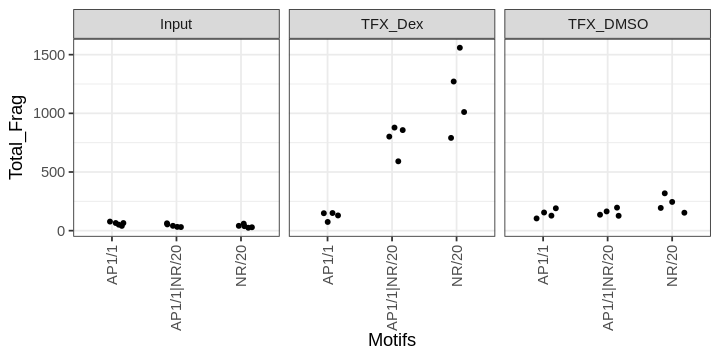

In [56]:
options(repr.plot.height=3, repr.plot.width=6)
ggplot(tmp, aes(x=Motifs, y=Total_Frag)) + 
    geom_jitter(width=0.2, size=1.0) + 
    facet_wrap(~Sample) +
    theme_bw() + 
    theme(axis.text.x = element_text(vjust=0.5, hjust=1, angle=90))

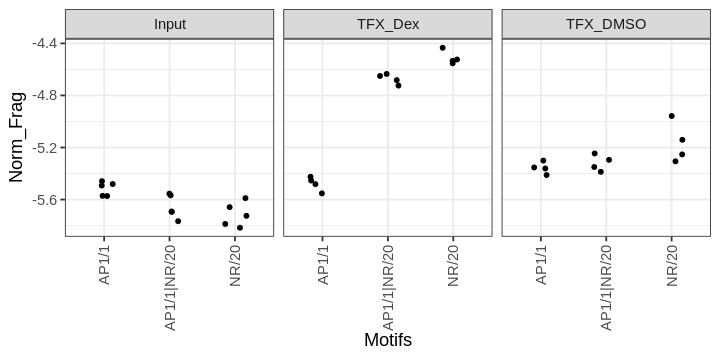

In [57]:
options(repr.plot.height=3, repr.plot.width=6)
ggplot(tmp, aes(x=Motifs, y=Norm_Frag)) + 
    geom_jitter(width=0.2, size=1.0) + 
    facet_wrap(~Sample) +
    theme_bw() + 
    theme(axis.text.x = element_text(vjust=0.5, hjust=1, angle=90))

In [18]:
dat = bind_rows(lst_dat_bed)
dat = dat %>% 
   group_by(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Motif, SID) %>% 
   summarize(Count_Motif = n())

dat = dat %>% dplyr::filter(Motif == "AP1/1" | Motif == "NR/20")
dat = dat %>% 
    group_by(SID, Motif, Count_Motif) %>% 
    summarize(Total_Frag = sum(Count_Frag))

dat = left_join(dat, dat_lib, by="SID")

`summarise()` has grouped output by 'Chrom_Frag', 'Start_Frag', 'End_Frag', 'Count_Frag', 'Motif'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'SID', 'Motif'. You can override using the `.groups` argument.


In [12]:
tmp

SID,Motif,Count_Motif,Total_Frag
Input1,AP1/1,1,64
Input1,AP1/1,2,33
Input1,NR/20,1,48
Input1,NR/20,2,25
Input2,AP1/1,1,77
Input2,AP1/1,2,29
Input2,NR/20,1,55
Input2,NR/20,2,24
Input3,AP1/1,1,108
Input3,AP1/1,2,32


In [26]:
dat = bind_rows(lst_dat_bed)
dat = dat %>% 
    group_by(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Motif, SID) %>% 
    summarize(Count_Motif = n())
dat = dat %>% group_by(SID, Motif, Count_Motif) %>% 
    summarize(
        Total_Frag = sum(Count_Frag),
        Mean_Frag  = mean(Count_Frag),
    )
dat_bed = dat %>% rowwise() %>% mutate(Sample = get_sample(SID))

`summarise()` has grouped output by 'Chrom_Frag', 'Start_Frag', 'End_Frag', 'Count_Frag', 'Motif'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'SID', 'Motif'. You can override using the `.groups` argument.


In [5]:
ctypes = c(col_character(), col_integer(), col_integer(), col_integer(),
           col_character(), col_integer(), col_integer(), col_character(),
           col_double(), col_integer())
cnames = c("Chrom_Frag",  "Start_Frag",  "End_Frag",  "Count_Frag", 
           "Chrom_Motif", "Start_Motif", "End_Motif", "Motif", "Score", 
           "Overlap")

target = "target_PER1"
motif  = "chr17"

idn_sample = "Input1"
fdiry = file.path(FD_DAT, idn_sample)
fname = paste0(target, "_", motif, ".bed")
fpath = file.path(fdiry, fname)
print(fpath)
dat_ann = read_tsv(fpath, col_types=ctypes, col_names=cnames)

[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input1/target_PER1_chr17.bed"


In [7]:
head(dat_ann)

Chrom_Frag,Start_Frag,End_Frag,Count_Frag,Chrom_Motif,Start_Motif,End_Motif,Motif,Score,Overlap
chr17,8148117,8149012,1,chr17,8148107,8148124,KLF/SP/2,9.0318,7
chr17,8148117,8149012,1,chr17,8148109,8148121,INSM1,6.1647,4
chr17,8148117,8149012,1,chr17,8148109,8148129,GC-tract,8.3277,12
chr17,8148117,8149012,1,chr17,8148123,8148133,GLI,7.4318,10
chr17,8148117,8149012,1,chr17,8148124,8148139,NR/17,7.8649,15
chr17,8148117,8149012,1,chr17,8148126,8148137,KLF/SP/1,11.3678,11


In [8]:
table(dat_ann$Count_Frag)


    1     2 
38425   170 

In [9]:
tmp = dat_ann
tmp = tmp %>% 
    group_by(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Motif) %>% 
    summarize(Count_Motif = n())
tmp

`summarise()` has grouped output by 'Chrom_Frag', 'Start_Frag', 'End_Frag', 'Count_Frag'. You can override using the `.groups` argument.


Chrom_Frag,Start_Frag,End_Frag,Count_Frag,Motif,Count_Motif
chr17,8148117,8149012,1,AP1/1,2
chr17,8148117,8149012,1,AP1/2,1
chr17,8148117,8149012,1,CENBP,1
chr17,8148117,8149012,1,CREB/ATF/1,2
chr17,8148117,8149012,1,CREB/ATF/2,1
chr17,8148117,8149012,1,CREB/ATF/3,1
chr17,8148117,8149012,1,CTCF,3
chr17,8148117,8149012,1,E2F/1,1
chr17,8148117,8149012,1,E2F/2,1
chr17,8148117,8149012,1,Ebox/CACCTG,1


In [10]:
tmp = dat_ann
tmp = tmp %>% 
    group_by(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Motif) %>% 
    summarize(Count_Motif = n())
tmp = tmp %>% group_by(Motif, Count_Motif) %>% 
    summarize(Total_Frag = sum(Count_Frag))
tmp

`summarise()` has grouped output by 'Chrom_Frag', 'Start_Frag', 'End_Frag', 'Count_Frag'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'Motif'. You can override using the `.groups` argument.


Motif,Count_Motif,Total_Frag
AHR,1,22
AHR,2,12
AHR,3,10
AIRE,1,10
AIRE,2,2
AP1/1,1,64
AP1/1,2,33
AP1/2,1,59
AP1/2,2,35
AP1/2,3,3


In [13]:
table(tmp$Count_Motif)


  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19 
237 179 113  73  52  35  22  11   9   7   5   3   2   2   2   1   2   1   1 

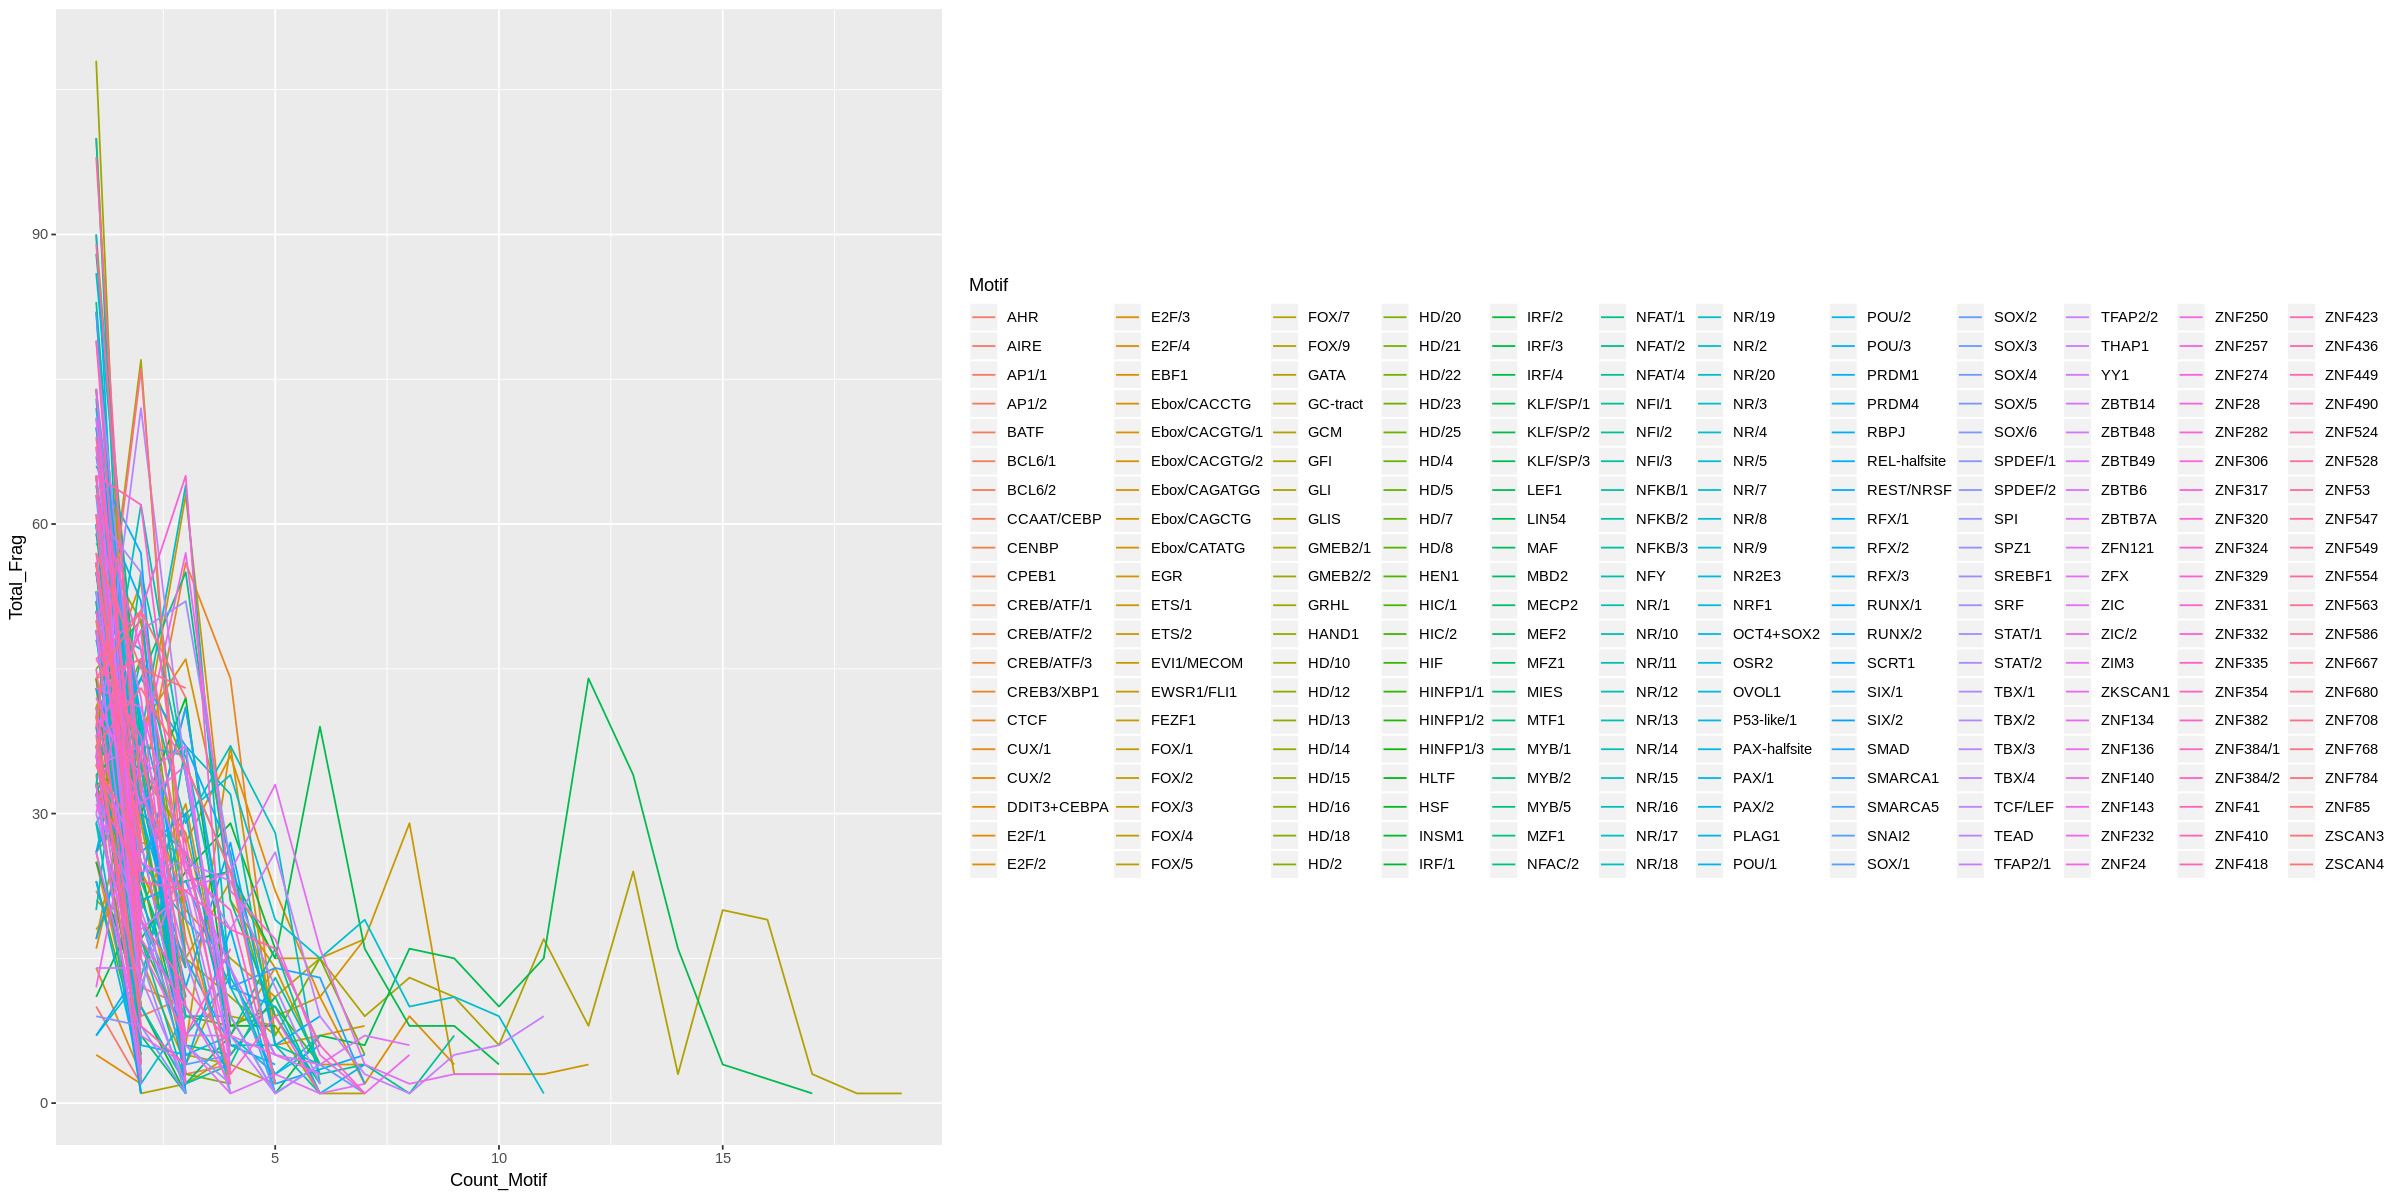

In [12]:
options(repr.plot.height=10, repr.plot.width=20)
ggplot(tmp, aes(x=Count_Motif, y=Total_Frag, group=Motif, color=Motif)) + geom_line()

In [17]:
ctypes = c(col_character(), col_integer(), col_integer(), col_integer(),
           col_character(), col_integer(), col_integer(), col_character(),
           col_double(), col_integer())
cnames = c("Chrom_Frag",  "Start_Frag",  "End_Frag",  "Count_Frag", 
           "Chrom_Motif", "Start_Motif", "End_Motif", "Motif", "Score", 
           "Overlap")

target = "target_PER1"
motif  = "chr17"

lst_dat = lapply(idn_samples, function(idn_sample){
    fdiry = file.path(FD_DAT, idn_sample)
    fname = paste0(target, "_", motif, ".bed")
    fpath = file.path(fdiry, fname)
    dat   = read_tsv(fpath, col_types=ctypes, col_names=cnames)
    dat   = dat %>% mutate(SID = idn_sample)
    return(dat)
})

In [20]:
get_sample = function(idn){
    if(grepl(pattern = "Input", x = idn)){return("Input")}
    if(grepl(pattern = "DMSO",  x = idn)){return("DMSO")}
    if(grepl(pattern = "Dex",   x = idn)){return("Dex")}
}

In [36]:
dat = bind_rows(lst_dat)
dat = dat %>% 
    group_by(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Motif, SID) %>% 
    summarize(Count_Motif = n())
dat = dat %>% group_by(SID, Motif, Count_Motif) %>% 
    summarize(
        Total_Frag = sum(Count_Frag),
        Mean_Frag  = mean(Count_Frag),
    )
dat = dat %>% rowwise() %>% mutate(Sample = get_sample(SID))

`summarise()` has grouped output by 'Chrom_Frag', 'Start_Frag', 'End_Frag', 'Count_Frag', 'Motif'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'SID', 'Motif'. You can override using the `.groups` argument.


In [37]:
dat %>% dplyr::filter(Motif == "NR/20")

SID,Motif,Count_Motif,Total_Frag,Mean_Frag,Sample
Input1,NR/20,1,48,1.000000,Input
Input1,NR/20,2,25,1.000000,Input
Input2,NR/20,1,55,1.000000,Input
Input2,NR/20,2,24,1.000000,Input
Input3,NR/20,1,77,1.013158,Input
Input3,NR/20,2,46,1.022222,Input
Input4,NR/20,1,62,1.050847,Input
Input4,NR/20,2,20,1.000000,Input
Input5,NR/20,1,38,1.000000,Input
Input5,NR/20,2,18,1.000000,Input


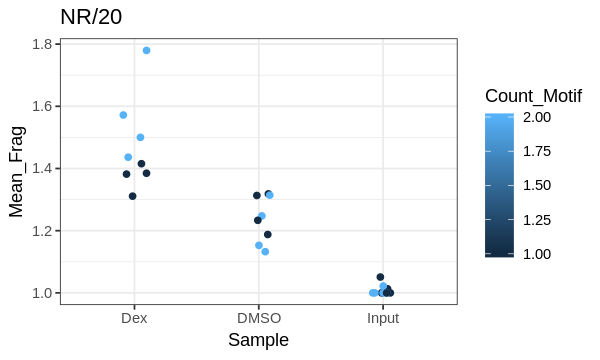

In [44]:
options(repr.plot.height=3, repr.plot.width=5)
set.seed(123)
dat %>% 
    dplyr::filter(Motif == "NR/20") %>%
    ggplot(aes(x=Sample, y=Mean_Frag, color=Count_Motif)) + 
    geom_jitter(width=0.1) + theme_bw() + labs(title="NR/20")

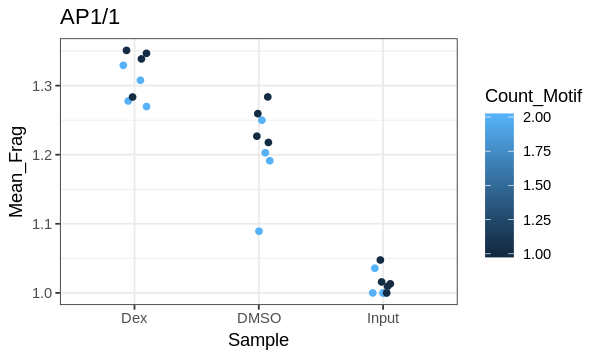

In [45]:
options(repr.plot.height=3, repr.plot.width=5)
set.seed(123)
dat %>% 
    dplyr::filter(Motif == "AP1/1") %>%
    ggplot(aes(x=Sample, y=Mean_Frag, color=Count_Motif)) + 
    geom_jitter(width=0.1) + theme_bw() + labs(title="AP1/1")

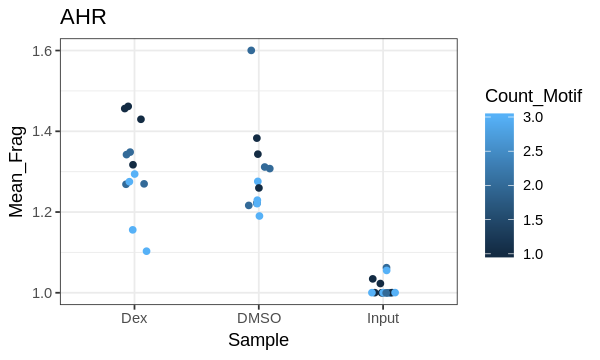

In [47]:
options(repr.plot.height=3, repr.plot.width=5)
set.seed(123)
dat %>% 
    dplyr::filter(Motif == "AHR") %>%
    ggplot(aes(x=Sample, y=Mean_Frag, color=Count_Motif)) + 
    geom_jitter(width=0.1) + theme_bw() + labs(title="AHR")

In [49]:
dat = bind_rows(lst_dat)
dat = dat %>% dplyr::filter(Motif == "AP1/1" | Motif == "NR/20")
head(dat)

Chrom_Frag,Start_Frag,End_Frag,Count_Frag,Chrom_Motif,Start_Motif,End_Motif,Motif,Score,Overlap,SID
chr17,8148117,8149012,1,chr17,8148425,8148433,AP1/1,6.7321,8,Input1
chr17,8148117,8149012,1,chr17,8148917,8148925,AP1/1,8.0514,8,Input1
chr17,8148122,8149107,1,chr17,8148425,8148433,AP1/1,6.7321,8,Input1
chr17,8148122,8149107,1,chr17,8148917,8148925,AP1/1,8.0514,8,Input1
chr17,8148178,8149194,1,chr17,8148425,8148433,AP1/1,6.7321,8,Input1
chr17,8148178,8149194,1,chr17,8148917,8148925,AP1/1,8.0514,8,Input1


In [51]:
table(dat$Motif)


AP1/1 NR/20 
 5603  9778 

In [72]:
tmp = dat %>% 
    group_by(Chrom_Frag, Start_Frag, End_Frag, SID, Count_Frag) %>% 
    summarize(
        Motifs=paste(unique(sort(Motif)), collapse="|"))
tmp = tmp %>% 
   group_by(Motifs, SID) %>% 
   summarize(
       Total_Frag = sum(Count_Frag), 
       Mean_Frag = mean(Count_Frag))
tmp = tmp %>% rowwise() %>% mutate(Sample = get_sample(SID))
tmp

`summarise()` has grouped output by 'Chrom_Frag', 'Start_Frag', 'End_Frag', 'SID'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'Motifs'. You can override using the `.groups` argument.


Motifs,SID,Total_Frag,Mean_Frag,Sample
AP1/1,Input1,65,1.015625,Input
AP1/1,Input2,65,1.031746,Input
AP1/1,Input3,77,1.013158,Input
AP1/1,Input4,51,1.000000,Input
AP1/1,Input5,41,1.000000,Input
AP1/1,TFX2_Dex,150,1.181102,Dex
AP1/1,TFX2_DMSO,191,1.364286,DMSO
AP1/1,TFX3_Dex,74,1.298246,Dex
AP1/1,TFX3_DMSO,104,1.155556,DMSO
AP1/1,TFX4_Dex,130,1.313131,Dex


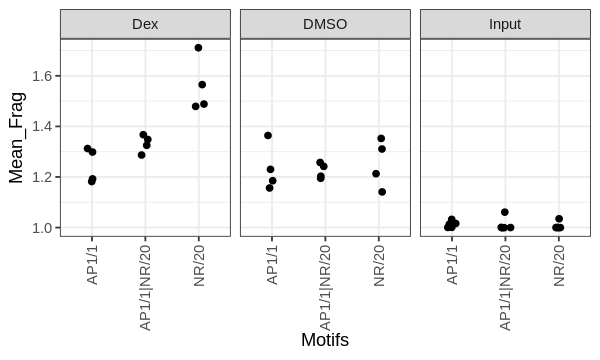

In [73]:
ggplot(tmp, aes(x=Motifs, y=Mean_Frag)) + 
    geom_jitter(width=0.1) + 
    facet_grid(.~Sample) +
    theme_bw() +
    theme(axis.text.x = element_text(vjust=0.5, hjust=1, angle=90))

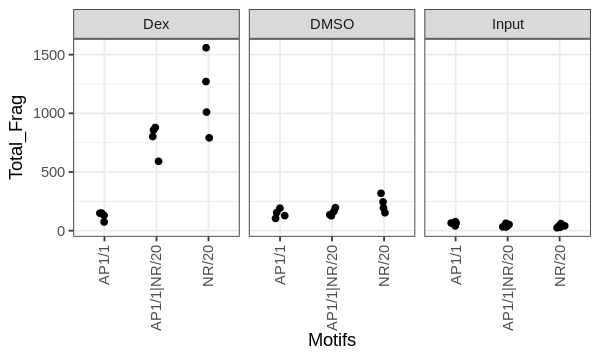

In [74]:
ggplot(tmp, aes(x=Motifs, y=Total_Frag)) + 
    geom_jitter(width=0.1) + 
    facet_grid(.~Sample) +
    theme_bw() +
    theme(axis.text.x = element_text(vjust=0.5, hjust=1, angle=90))

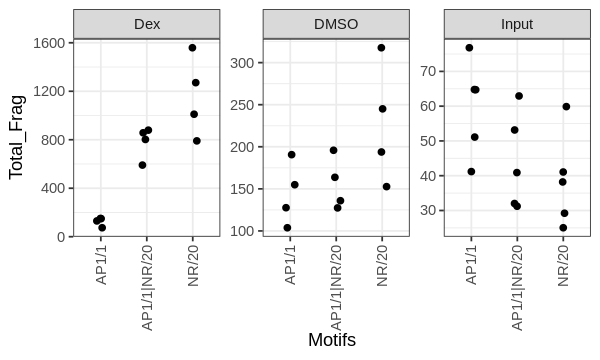

In [75]:
ggplot(tmp, aes(x=Motifs, y=Total_Frag)) + 
    geom_jitter(width=0.1) + 
    facet_wrap(~Sample, scales = "free") +
    theme_bw() +
    theme(axis.text.x = element_text(vjust=0.5, hjust=1, angle=90)) 